# Exploratory Analysis of Cost and Utilization Data, 2001 - 2016

### Overview of the Three Different Levels of Summarization

#### Event Level
The individual event level provides payers, costs, and utilization data at the most granular level. There's Event Level data for dental (DUE), facility (FAE), medical provider (MPE), inpatient hospital (IPE), outpatient hospital (OPE), instituitional events (IUE), and prescription medicine events (PME).

#### Person Summary Level  (PS)
Summarizes all payers and costs across service categories and summarizes type of service amounts. "These records show only one total for each person, service, and payer"

#### Service Summary Level (SS)  
Summarizes at the service level: dental, facility, home health, hospice, medical provider, inpatient hospital, institutional, OP hospital, and prescribed medicines. If we add up all the SS categories by person, we get the PS values.


*Note that PS and SS variables are summarized in two ways. (1) summarized from event records, (2) adjusted to compensate for Medicare covered days that were not covered by interview reference periods.*

### Data Wrangling
Append Master Files (2001-2016) to combine data across years:

In [19]:
qui cd "J:\Geriatrics\Geri\MCBSProject"

qui use "Data\Master Files\MCBS_MASTER_2001.dta", clear

forvalues yr = 2002/2016 {
    if `yr'!=2014 {
        qui append using "Data\Master Files\MCBS_MASTER_`yr'.dta", force
    }
}


View number of Medicare beneficiaries by year:

In [20]:
tab year,missing


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2001 |     17,931        7.22        7.22
       2002 |     17,739        7.14       14.36
       2003 |     17,428        7.02       21.37
       2004 |     16,994        6.84       28.22
       2005 |     17,095        6.88       35.10
       2006 |     17,561        7.07       42.17
       2007 |     18,066        7.27       49.44
       2008 |     15,777        6.35       55.79
       2009 |     15,946        6.42       62.21
       2010 |     16,079        6.47       68.68
       2011 |     16,331        6.57       75.25
       2012 |     16,454        6.62       81.88
       2013 |     16,174        6.51       88.39
       2015 |     14,068        5.66       94.05
       2016 |     14,778        5.95      100.00
------------+-----------------------------------
      Total |    248,421      100.00


We want to visualize total spending over time, so we need to keep the PS cost variables and year variable:

In [21]:
keep      pamt* year
describe  pamt*




              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
pamtdu          double  %12.0g                Adj. sum for dental events
pamthh          double  %12.0g                Adj. sum for home health agency events
pamthp          double  %12.0g                Adj. sum for hospice events
pamtip          double  %12.0g                Adj. sum for inpatient events
pamtiu          double  %12.0g                Adj. sum for institutional events
pamtmp          double  %12.0g                Adj. sum for medical provider events
pamtop          double  %12.0g                Adj. sum for outpatient events
pamtpm          double  %12.0g                Adj. sum for prescribed medicine events
pamtf

Aggregate expense variables by year to get total spending:

In [22]:
qui ds year, not
qui collapse (sum) `r(varlist)', by(year)

*Label variables of interest
label var pamtcaid "Medicaid"
label var pamtcare "Medicare"
label var pamtoop  "Out-of-pocket"
label var pamttot  "Total payments"
label var pamthp   "Hospice payments"


Browse aggregated amounts:

In [23]:
list year pamtcaid pamtcare pamtoop pamttot pamthp, sep(0)


     +---------------------------------------------------------------------------+
     | year      pamtcaid      pamtcare       pamtoop       pamttot       pamthp |
     |---------------------------------------------------------------------------|
  1. | 2001   25801959.83   66171366.94   32427593.66   157766394.1      1497622 |
  2. | 2002   24781234.29   72666326.55   32767338.11   165394871.7      1798149 |
  3. | 2003   23612135.95   75434946.31   33297818.92   165710692.1      2106381 |
  4. | 2004    24950294.4   78871970.89   33059816.44   170672386.9      2495619 |
  5. | 2005   27682469.48   82125886.53   33390803.54   180413442.4      2704711 |
  6. | 2006   23008380.02   93930044.54   34638652.06   189203696.7      3233805 |
  7. | 2007      22978786   101004171.4    35520596.4   196530689.9      3131986 |
  8. | 2008    22797479.1     100132788   33046755.49   194992725.7      3716489 |
  9. | 2009   20162192.72   95042887.77   30368659.29   179920837.7      3570999 |
 10

Convert $ amount to millions:

In [24]:
qui ds year, not
foreach x in `r(varlist)' {
qui replace `x' = `x'/1000000
}

## Time-series Line Plot of Select Expense Variables

Declare data to be time-series data:

In [25]:
tsset year 

        time variable:  year, 2001 to 2016, but with a gap
                delta:  1 unit


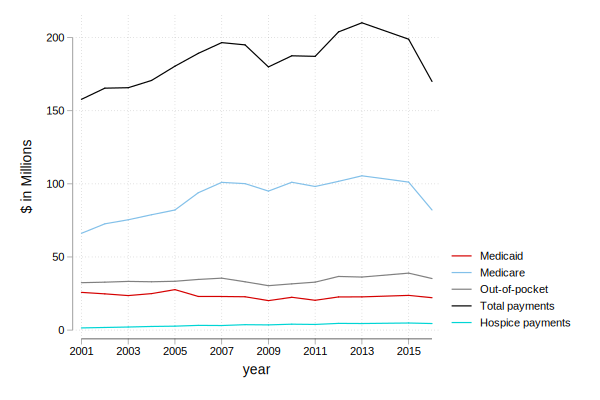

In [26]:
local vars pamtcaid pamtcare pamtoop pamttot pamthp

twoway (tsline `vars'), scheme(cleanplots) tscale(lwidth(vthin) lpattern(solid) line) xla(2001(2)2016) ///
                        ytitle("$ in Millions") yla(0(50)200)